In [59]:
import numpy as np
import matplotlib.pyplot as plt


In [60]:
BOARD_SIZE = 3
PLAYER_X = 1
PLAYER_O = -1
EMPTY = 0

NUM_SIMULATIONS = 100 + 1 *50


In [61]:
def check_winner(board): 
    lines = np.concatenate([
        board.sum(axis=0),
        board.sum(axis=1),
        [np.trace(board)],
        [np.trace(np.fliplr(board))]
    ])

    if 3 in lines:
        return PLAYER_X
    if -3 in lines:
        return PLAYER_O
    return 0


In [62]:
def play_random_game():
    board = np.zeros((BOARD_SIZE, BOARD_SIZE), dtype=int)
    player = PLAYER_X
    moves = 0

    while True:
        empty_cells = np.argwhere(board == EMPTY)
        if empty_cells.size == 0:
            return 0, moves

        i, j = empty_cells[np.random.choice(len(empty_cells))]
        board[i, j] = player
        moves += 1

        winner = check_winner(board)
        if winner != 0:
            return winner, moves

        player = -player


In [63]:
results = []
moves_list = []

for i in range(NUM_SIMULATIONS):
    winner, moves = play_random_game()
    results.append(winner)
    moves_list.append(moves)

results = np.array(results)
moves_list = np.array(moves_list)


In [64]:
x_wins = np.mean(results == PLAYER_X) * 100
o_wins = np.mean(results == PLAYER_O) * 100
eq  = np.mean(results == 0) * 100
eq

np.float64(15.333333333333332)

In [65]:
avg_moves = moves_list.mean()
avg_moves

np.float64(7.906666666666666)

In [66]:
print(f"X wins: {x_wins:.2f}%")
print(f"O wins: {o_wins:.2f}%")
print(f"Draws:  {eq:.2f}%")
print(f"Average number of moves: {avg_moves:.2f}")


X wins: 60.67%
O wins: 24.00%
Draws:  15.33%
Average number of moves: 7.91


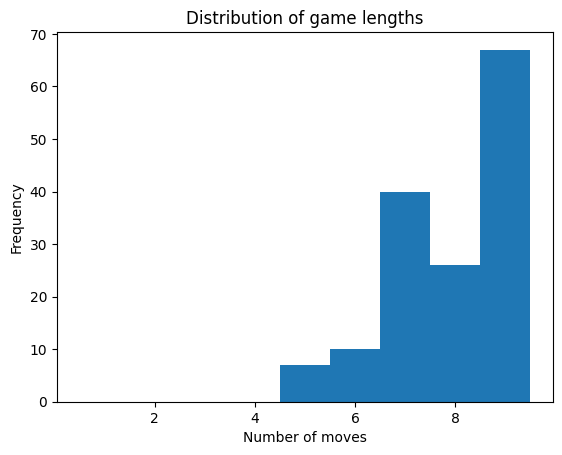

In [67]:
plt.figure()
plt.hist(moves_list, bins=range(1, 11), align="left")
plt.xlabel("Number of moves")
plt.ylabel("Frequency")
plt.title("Distribution of game lengths")
plt.show()
